#### The goal of this challenge is to build a model that predicts conversion rate and, based on the model, come up with ideas to improve it.
* EDA 
    * independent variable
        * plot of categorical data
        * histogram of numeric
    * conversion with category and correlation
* Model Use Random Forest, partial dependence plot (Decision Tree)
* recommendation
    * New user is an important variable with used customer of higher conversion, and age high conversion with young users

#### Recommendation
* New user
    * used user perform better than new customer
    * sending more emails to used users 
* Age
    * Young users have higher conversion rate
    * Try to understand why the website does not work for older people
* Country
    * Germany has high conversion rate but small volume, should target to bring up volume
    * China performs worst, maybe try to understand what is going on causing the low conversion rate

In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [2]:
import pandas
pandas.set_option('display.max_columns', 10)
pandas.set_option('display.width', 350)
  
#read from google drive
  
print(data.head())

  country  age  new_user source  total_pages_visited  converted
0      UK   25         1    Ads                    1          0
1      US   23         1    Seo                    5          0
2      US   28         1    Seo                    4          0
3   China   39         1    Seo                    5          0
4      US   30         1    Seo                    6          0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [5]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


Text(0.5, 1.0, 'Count by Country')

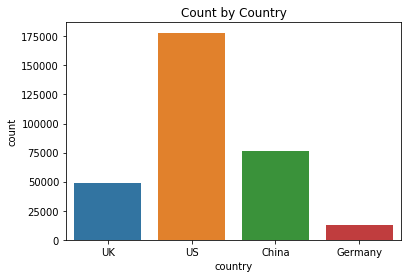

In [6]:
sns.countplot(x='country',data=data)
plt.title('Count by Country')

Text(0.5, 1.0, 'County by Source')

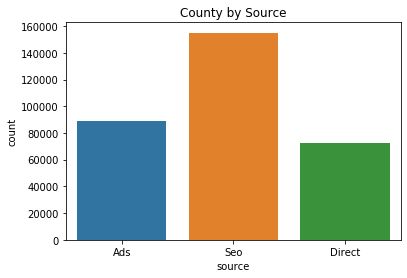

In [7]:
sns.countplot(x='source',data=data)
plt.title('County by Source')

Text(0.5, 1.0, 'County by new_user')

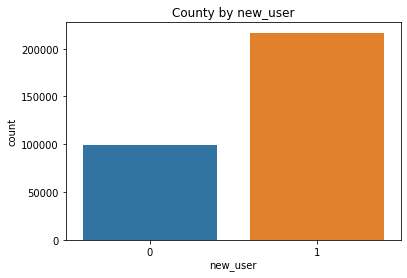

In [9]:
sns.countplot(x='new_user',data=data)
plt.title('County by new_user')

Text(0.5, 1.0, 'Age distribution')

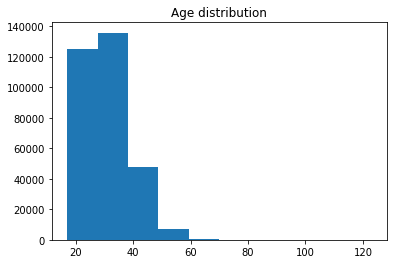

In [10]:
plt.hist(data['age'])
plt.title('Age distribution')

Text(0.5, 1.0, 'Page Visit distribution')

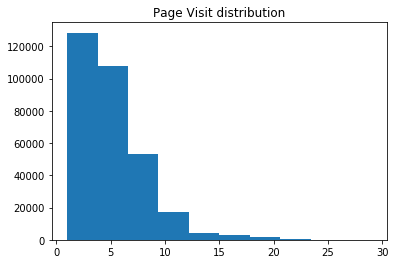

In [11]:
plt.hist(data['total_pages_visited'])
plt.title('Page Visit distribution')

In [12]:
data[['age','total_pages_visited']].describe()

,age,total_pages_visited
count,316200.000000,316200.000000
mean,30.569858,4.872966
std,8.271802,3.341104
min,17.000000,1.000000
25%,24.000000,2.000000
50%,30.000000,4.000000
75%,36.000000,7.000000
max,123.000000,29.000000


In [13]:
data[['age','total_pages_visited']].isna().sum()

age                    0
total_pages_visited    0
dtype: int64

In [14]:
data['converted'].mean()

0.03225806451612903

#### Correlation of variables with Converted

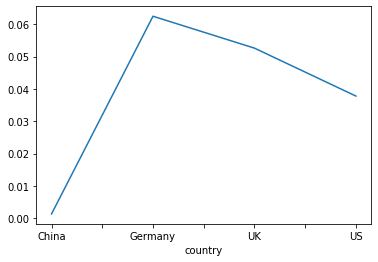

In [17]:
data.groupby(['country'])['converted'].mean().plot()
plt.title('conversion by country')

Text(0.5, 1.0, 'conversion by source')

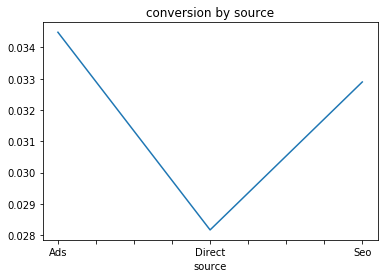

In [18]:
data.groupby(['source'])['converted'].mean().plot()
plt.title('conversion by source')

Text(0.5, 1.0, 'conversion by new_user')

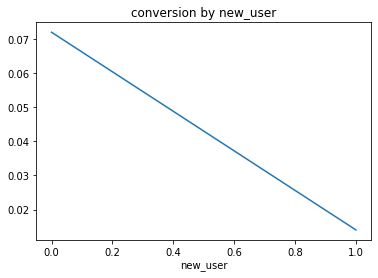

In [19]:
data.groupby(['new_user'])['converted'].mean().plot()
plt.title('conversion by new_user')

In [22]:
data[['age','total_pages_visited']].corrwith(data['converted'])

age                   -0.088797
total_pages_visited    0.528994
dtype: float64

#### Data manipulation
* outlier

In [25]:
data=data[data['age']<90]

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316198 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316198 non-null  object
 1   age                  316198 non-null  int64 
 2   new_user             316198 non-null  int64 
 3   source               316198 non-null  object
 4   total_pages_visited  316198 non-null  int64 
 5   converted            316198 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.9+ MB


In [36]:
data_dummy=pandas.get_dummies(data)

In [37]:
data_dummy.head()

,age,new_user,total_pages_visited,converted,country_China,...,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,...,1,0,1,0,0
1,23,1,5,0,0,...,0,1,0,0,1
2,28,1,4,0,0,...,0,1,0,0,1
3,39,1,5,0,1,...,0,0,0,0,1
4,30,1,6,0,0,...,0,1,0,0,1


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [40]:
x_train,x_test,y_train,y_test=train_test_split(data_dummy.loc[:,~data_dummy.columns.isin(['converted'])],data_dummy['converted'],test_size=0.2,random_state=123)

In [41]:
x_train.shape

(252958, 10)

In [75]:
x_train.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
11937,25,1,8,0,0,0,1,1,0,0
20935,36,0,11,0,0,1,0,0,0,1
172496,19,1,10,0,0,1,0,1,0,0
192608,18,1,5,0,0,0,1,0,0,1
249105,38,1,3,0,0,0,1,0,1,0


In [42]:
y_train.shape

(252958,)

In [81]:
rf=RandomForestClassifier(n_estimators=100,max_depth=3,oob_score=True,random_state=123,class_weight={0:1,1:10})

In [82]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 10}, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=123, verbose=0, warm_start=False)

In [83]:
print('OOB accuracy score is',rf.oob_score_)

OOB accuracy score is 0.9759604361198302


In [84]:
print('AUC is',roc_auc_score(y_train,rf.predict_proba(x_train)[:,1]))

AUC is 0.9755288771925782


In [87]:
print('Confusion Matrix','\n', confusion_matrix(y_train,rf.predict(x_train)))

Confusion Matrix 
 [[240282   4447]
 [  1378   6851]]


In [88]:
accuracy_score(y_train,rf.predict(x_train))

0.9769724618316085

In [53]:
pandas.DataFrame(confusion_matrix(y_train, rf.oob_decision_function_[:,1].round(), labels=[0, 1]))

,0,1
0,230333,14396
1,567,7662


In [89]:
#get prediction on test data
test_pred=rf.predict(x_test)

In [90]:
print('test accuracy is', accuracy_score(y_test,test_pred))

test accuracy is 0.9760594560404807


In [91]:
print('test AUC is', roc_auc_score(y_test,rf.predict_proba(x_test)[:,1]),
"\n",
"test confusion matrix is",
"\n", 
pandas.DataFrame(confusion_matrix(y_test,test_pred,labels=[0,1])))

test AUC is 0.9763341968453448 
 test confusion matrix is 
        0     1
0  60103  1168
1    346  1623


In [92]:
pandas.DataFrame(zip(x_train.columns,rf.feature_importances_),columns=['Variable','importance']).sort_values('importance',ascending=False)

,Variable,importance
2,total_pages_visited,0.671899
1,new_user,0.159820
3,country_China,0.090075
0,age,0.052054
6,country_US,0.012145
5,country_UK,0.012028
4,country_Germany,0.001661
8,source_Direct,0.000191
7,source_Ads,0.000093
9,source_Seo,0.000034


In [107]:
rf1=RandomForestClassifier(n_estimators=100,max_features=3,oob_score=True,random_state=123,class_weight={0:1,1:10})

In [108]:
rf1.fit(x_train.drop(['total_pages_visited'],axis=1),y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 10}, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=123, verbose=0, warm_start=False)

In [109]:
rf1.oob_score_

0.8880090766056025

In [110]:
print('accuracy score is',accuracy_score(y_train,rf1.predict(x_train.drop(['total_pages_visited'],axis=1))))

accuracy score is 0.8905430941104847


In [111]:
print('AUC is', roc_auc_score(y_train,rf1.predict_proba(x_train.drop(['total_pages_visited'],axis=1))[:,1]))

AUC is 0.8267169562541372


In [112]:
#apply model on test dataset
print('test accuracy is',rf1.score(x_test.drop(['total_pages_visited'],axis=1),y_test))

test accuracy is 0.8921252371916508


In [113]:
accuracy_score(rf1.predict(x_test.drop(['total_pages_visited'],axis=1)),y_test)

0.8921252371916508

In [114]:
print('test confusion matrix is','\n',pandas.DataFrame(confusion_matrix(y_test,rf1.predict(x_test.drop(['total_pages_visited'],axis=1)),labels=[0,1])))

test confusion matrix is 
        0     1
0  55498  5773
1   1049   920


In [116]:
pandas.DataFrame(zip(x_train.drop(['total_pages_visited'],axis=1).columns,rf1.feature_importances_),columns=['Variable','importance']).sort_values('importance',ascending=False)

,Variable,importance
1,new_user,0.454358
0,age,0.245605
2,country_China,0.204265
5,country_US,0.036246
4,country_UK,0.030124
3,country_Germany,0.020284
7,source_Direct,0.004137
6,source_Ads,0.002747
8,source_Seo,0.002234


In [119]:
from pdpbox import pdp

In [122]:
pdp_iso = pdp.pdp_isolate( model=rf1, 
                          dataset=x_train.drop(['total_pages_visited'], axis=1),      
                          model_features=list(x_train.drop(['total_pages_visited'], axis=1)), 
                          feature=['country_Germany', 'country_UK', 'country_US'], 
                          num_grid_points=50)

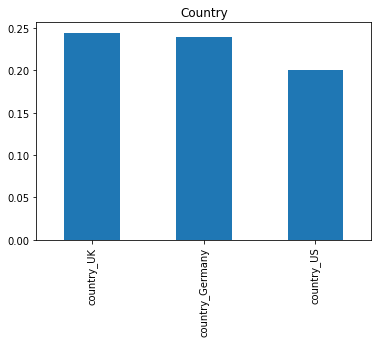

In [123]:
pdp_dataset = pandas.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar', title='Country')
plt.show()

In [127]:
#
pdp_iso =pdp.pdp_isolate(model=rf1,
                         dataset=x_train.drop(['total_pages_visited'],axis=1),
                         model_features=list(x_train.drop(['total_pages_visited'],axis=1)),
                         feature=['source_Ads','source_Seo','source_Direct'],
                        num_grid_points=50)

In [129]:
pdp_iso.display_columns

['source_Ads', 'source_Seo', 'source_Direct']

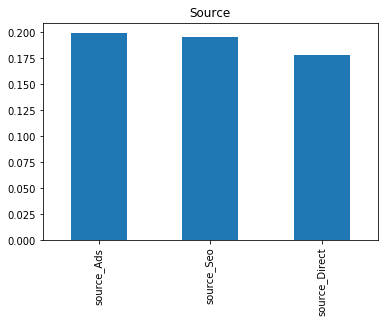

In [133]:
pdp_dataset=pandas.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar',title='Source')

In [135]:
pdp_iso =pdp.pdp_isolate(model=rf1,
                         dataset=x_train.drop(['total_pages_visited'],axis=1),
                         model_features=list(x_train.drop(['total_pages_visited'],axis=1)),
                         feature='new_user',
                        num_grid_points=50)

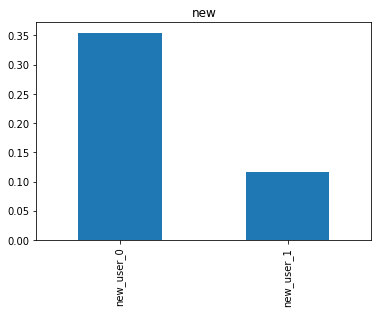

In [136]:
pdp_dataset=pandas.Series(pdp_iso.pdp,index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(kind='bar',title='new')

In [137]:
pdp_iso =pdp.pdp_isolate(model=rf1,
                         dataset=x_train.drop(['total_pages_visited'],axis=1),
                         model_features=list(x_train.drop(['total_pages_visited'],axis=1)),
                         feature='age',
                        num_grid_points=50)

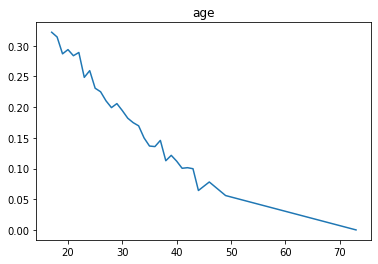

In [139]:
pdp_dataset=pandas.Series(pdp_iso.pdp,index=pdp_iso.feature_grids)
pdp_dataset.plot(title='age')

In [140]:
tree=DecisionTreeClassifier(max_depth=4,class_weight={0:1,1:10})
tree.fit(x_train.drop(['total_pages_visited'],axis=1),y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 1, 1: 10},
                       criterion='gini', max_depth=4, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [143]:
from sklearn.tree import plot_tree

[Text(1116.0, 978.48, 'new_user <= 0.5\ngini = 0.377\nsamples = 100.0%\nvalue = [0.748, 0.252]'),
 Text(558.0, 761.0400000000001, 'country_China <= 0.5\ngini = 0.492\nsamples = 31.5%\nvalue = [0.562, 0.438]'),
 Text(279.0, 543.6, 'age <= 29.5\ngini = 0.5\nsamples = 24.2%\nvalue = [0.493, 0.507]'),
 Text(139.5, 326.1600000000001, 'age <= 24.5\ngini = 0.48\nsamples = 12.1%\nvalue = [0.399, 0.601]'),
 Text(69.75, 108.72000000000003, 'gini = 0.459\nsamples = 6.6%\nvalue = [0.357, 0.643]'),
 Text(209.25, 108.72000000000003, 'gini = 0.497\nsamples = 5.4%\nvalue = [0.462, 0.538]'),
 Text(418.5, 326.1600000000001, 'age <= 39.5\ngini = 0.467\nsamples = 12.1%\nvalue = [0.628, 0.372]'),
 Text(348.75, 108.72000000000003, 'gini = 0.485\nsamples = 8.7%\nvalue = [0.588, 0.412]'),
 Text(488.25, 108.72000000000003, 'gini = 0.369\nsamples = 3.4%\nvalue = [0.755, 0.245]'),
 Text(837.0, 543.6, 'age <= 25.5\ngini = 0.056\nsamples = 7.3%\nvalue = [0.971, 0.029]'),
 Text(697.5, 326.1600000000001, 'source_Dir

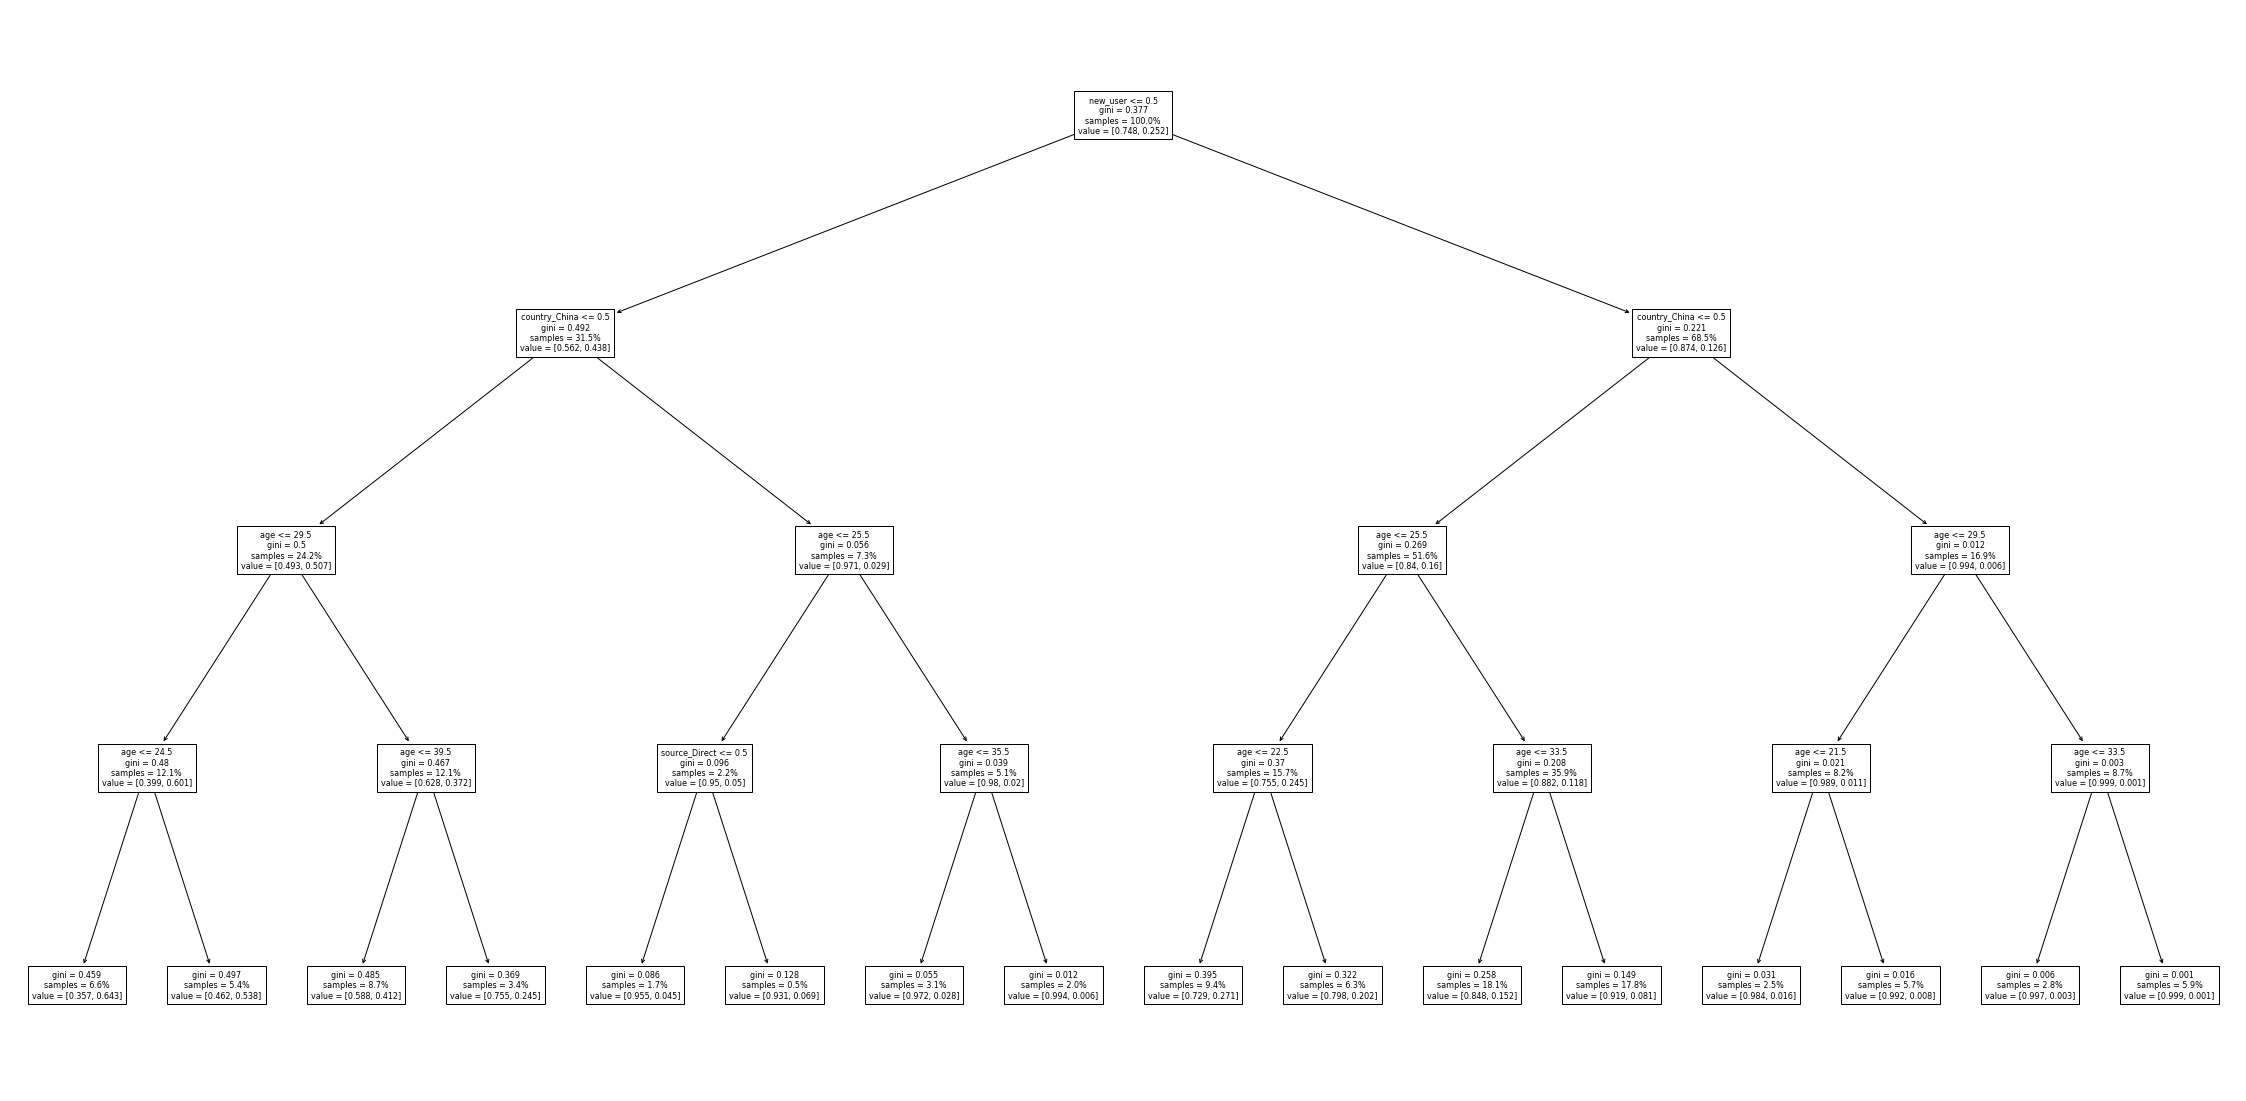

In [148]:
plt.figure(figsize=(40,20))
plot_tree(tree,feature_names=x_train.drop(['total_pages_visited'],axis=1).columns,proportion=True,fontsize=8)